In [1]:
import tensorflow as tf   
#tf version 2.5.0

class pose:
    def __init__(self):
      self.model = tf.keras.models.load_model('pose_model.h5')  #model
    def get_angle(self, img):    #get angles
        idx_tensor = [idx for idx in range(66)]
        idx_tensor = np.array(idx_tensor, dtype=np.float32)
        idx_tensor_yaw = [idx for idx in range(120)]
        idx_tensor_yaw = np.array(idx_tensor_yaw, dtype=np.float32)
        mean = [0.485, 0.456, 0.406]
        std = [0.229, 0.224, 0.225]      
        img = img/255
        img = (img - mean) / std
        predictions = self.model.predict(img, batch_size=8)
        yaw_predicted = (predictions[0])
        pitch_predicted = (predictions[1])
        roll_predicted = (predictions[2])
        yaw_predicted = np.sum(yaw_predicted*idx_tensor_yaw, axis=1)*3-180
        pitch_predicted = np.sum(pitch_predicted * idx_tensor, axis=1) * 3 - 99
        roll_predicted = np.sum(roll_predicted * idx_tensor, axis=1) * 3 - 99
        return yaw_predicted, pitch_predicted, roll_predicted  #returns 3 parameters


model = pose()


In [2]:
import numpy as np
import cv2
import keras
import matplotlib.pyplot as plt
from keras.preprocessing import image
import os
from os import listdir
from os.path import isfile, join
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 


def crop_and_pred(img_path):   #preprocessing 
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img_rgb = cv2.resize(img_rgb,(256,256))
    img_rgb = cv2.resize(img_rgb,(224,224))
    img_rgb = np.expand_dims(img_rgb, axis=0)
    yaw, pitch, roll = model.get_angle(img_rgb)   #predict
    pitch1 = pitch * np.pi 
    yaw1 = -(yaw * np.pi)
  
    y = yaw1   #lr
    p = pitch1 #fd

    if abs(y)<=90 and  -70 <= p:
        pred = "front"
    elif p < -70:
        pred = "down"
    elif y < -90:
        pred = "left"
    elif y > 90:
        pred = "right"
    else:
        pred = "front"
     
    return pred




Using TensorFlow backend.


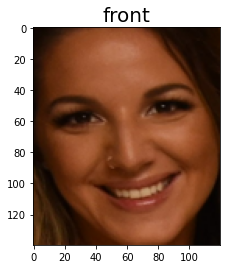

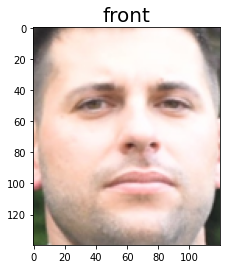

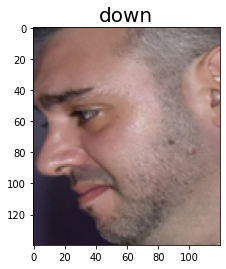

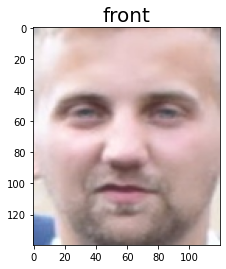

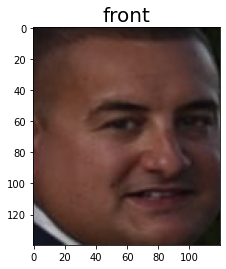

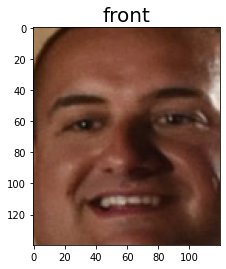

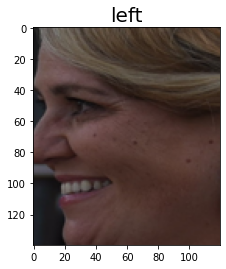

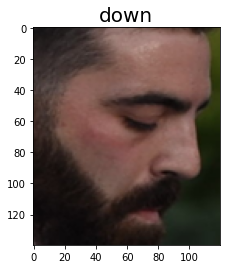

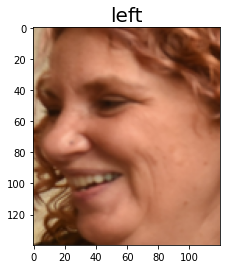

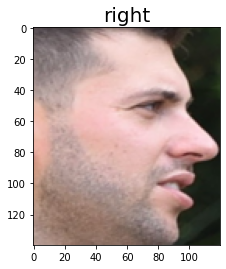

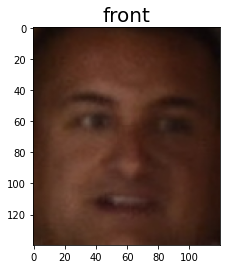

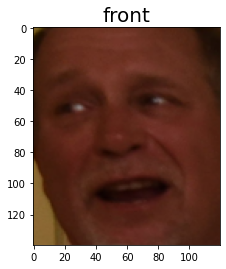

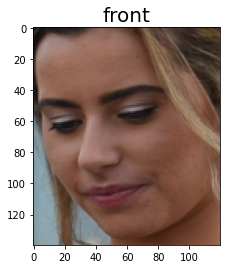

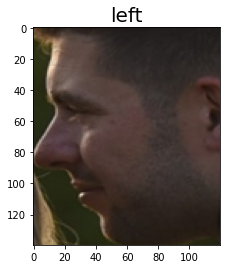

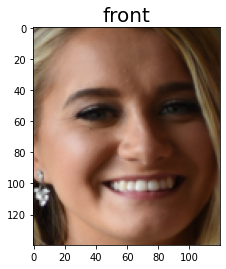

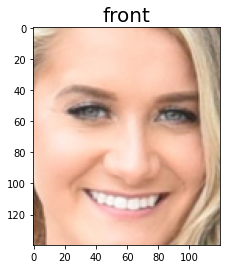

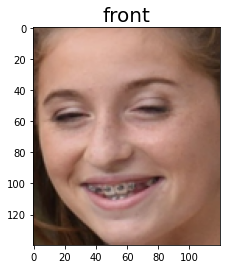

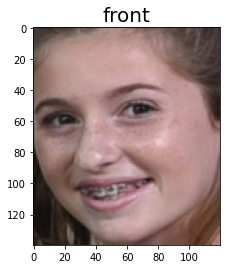

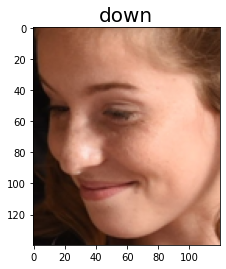

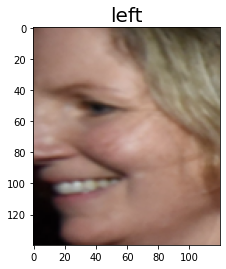

In [4]:
root = "sample/"
onlyfiles = [f for f in listdir(root) if isfile(join(root, f))][:20]

for element in onlyfiles:
    ext = element[-3:]
    if ext =="jpg" or ext =="png" :
        flag = crop_and_pred(root+element)    #pass image to crop_and_pred    #returns left/right/front/down

        img1 = image.load_img(root+element)
        img1 = img1.resize((120,140))
        plt.figure(figsize = (4,4))
        plt.title(flag,fontsize = 20)
        plt.imshow(img1)
